In [4]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
max_len=500

(x_train,y_train),(x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [8]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer = RMSprop(lr=1e-4), loss='binary_crossentropy',metrics=['acc'])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [9]:
history = model.fit(x_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 14ms/step - loss: 0.9687 - acc: 0.5080 - val_loss: 0.6894 - val_acc: 0.5246
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 0.6712 - acc: 0.6380 - val_loss: 0.6629 - val_acc: 0.6574
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 0.6233 - acc: 0.7564 - val_loss: 0.6044 - val_acc: 0.7546
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 0.5240 - acc: 0.8113 - val_loss: 0.4813 - val_acc: 0.8138
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.4031 - acc: 0.8502 - val_loss: 0.4114 - val_acc: 0.8378
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.3379 - acc: 0.8788 - val_loss: 0.3971 - val_acc: 0.8526
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.2993 - acc: 0.8950 - val_loss: 0.4180 - val_acc: 0.8556
Epoch 8/10
157/157 [==============================] - 2s 12ms/step - 

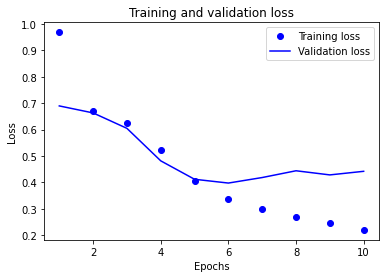

In [13]:
import matplotlib.pyplot as plt 

acc = history.history['acc']
loss_values=history.history['loss']
val_loss_values=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss') 
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()